## Perform clinphen

1. added new lemmatising options: 
    - tic -> ia or y  (e.g. dysplastic -> dysplasia)
    - ce -> t (e.g. absence -> absent)

## import data

In [1]:
import pandas as pd
import sys
sys.path.append('../')

df_train = pd.read_csv('../data/Bio-Lark/df_train.csv')
df_test = pd.read_csv('../data/Bio-Lark/df_test.csv')
df_valid = pd.read_csv('../data/Bio-Lark/df_valid.csv')

df_train.head()

,entID,docID,start,end,hpo,entity,text
0,12,1,35,53,HP_0000006,autosomal dominant,Townes-Brocks syndrome (TBS) is an autosomal d...
1,13,1,95,114,HP_0003828,variable expression,Townes-Brocks syndrome (TBS) is an autosomal d...
2,14,1,139,161,HP_0000356,external ear anomalies,Townes-Brocks syndrome (TBS) is an autosomal d...
3,15,1,163,175,HP_0000365,hearing loss,Townes-Brocks syndrome (TBS) is an autosomal d...
4,16,1,177,197,HP_0001841,preaxial polydactyly,Townes-Brocks syndrome (TBS) is an autosomal d...


### format trainingsdata -> to format usable for clinphen

In [141]:
df_train[df_train['docID']==7].replace(r'\n',' ', regex=True)['text'].iloc[0]

"Neurofibromatosis type 2 (NF2) is a highly penetrant autosomal dominant condition predisposing affected individuals to schwannomas and meningiomas. The proportion of children presenting with meningioma or schwannoma who have NF2 is not well described, and neither is the mode of presentation in most children with the inherited disease.  To determine the frequency of childhood meningioma and schwannoma cases caused by NF2 and the mode of presentation.  The records of the Manchester Children's Tumour Registry from 1954 were searched for cases of meningioma and schwannoma. Paediatric presentation in a large UK series of NF2 was also studied.  18% (61/334) of patients with NF2 on the UK database presented in the paediatric age group (0-15 years), frequently with the symptoms of an isolated tumour. More than half had no family history to alert the clinician to their susceptibility. Three of 22 children presenting with a meningioma on the Manchester Children's Tumour Registry have gone on to

In [134]:
df_train.replace('\n', '\t')

,entID,docID,start,end,hpo,entity,text
0,12,1,35,53,HP_0000006,autosomal dominant,Townes-Brocks syndrome (TBS) is an autosomal d...
1,13,1,95,114,HP_0003828,variable expression,Townes-Brocks syndrome (TBS) is an autosomal d...
2,14,1,139,161,HP_0000356,external ear anomalies,Townes-Brocks syndrome (TBS) is an autosomal d...
3,15,1,163,175,HP_0000365,hearing loss,Townes-Brocks syndrome (TBS) is an autosomal d...
4,16,1,177,197,HP_0001841,preaxial polydactyly,Townes-Brocks syndrome (TBS) is an autosomal d...
...,...,...,...,...,...,...,...
634,1912,225,705,726,HP_0002671,basal cell carcinomas,Mutations of the human Patched gene ( PTCH ) h...
635,1913,225,734,750,HP_0002885,medulloblastomas,Mutations of the human Patched gene ( PTCH ) h...
636,1914,225,809,824,HP_0002885,medulloblastoma,Mutations of the human Patched gene ( PTCH ) h...
637,1915,225,866,886,HP_0002671,basal cell carcinoma,Mutations of the human Patched gene ( PTCH ) h...


In [143]:
df_train.drop_duplicates(subset=['text'])[['docID', 'text']].rename(columns={'docID':'"MRN"','text':'"NOTE"'}).replace(r'\n',' ', regex=True).to_csv(r'data/df_train_bulk.txt', sep='|', index=False, quotechar="'") # quotechar

## employ clinphen

In [120]:
# df_train_bulk.txt
!C:/Users/levrex/Anaconda3/envs/my_env/Scripts/clinphen_bulk.py data/df_train_bulk.txt df_anno.txt2
    
#df_train_bulk.txt df_anno.txt 
#raw_output = !C:/Users/levrex/Anaconda3/envs/my_env/Scripts/clinphen.py example_data.txt 
    
#df_anno.txt 

Het systeem kan het opgegeven pad niet vinden.

C:\Users\levrex\Anaconda3\envs\my_env\lib\site-packages\clinphen_src\data\hpo_synonyms.txt
[{'', 'affect', 'neurofibromatosis', 'individual', 'i', 'nfu', 'to', 'penetrant', 'nf2', 'condition', 'a', 'neurofibromatosi', 'highly', 'high', 'autosomal', 'predisposing', 'affected', 'dominant', 'schwannomas', '2', 'type', 'highls', 'penetrate', 'schwannoma', 'highling', 'is', 'individuals', 'and'}, {'', 'meningioma', 'meningiomas', 'a'}, {'of', '', 'i', 'well', 'have', 'nfu', 'presenting', 'with', 'meningioma', 'who', 'nf2', 'proportion', 'schwannomum', 'child', 'described', 'a', 'schwannomon', 'schwannoma', 'children', 'is', 'or', 'the', 'describ', 'not', 'meningiomum', 'meningiomon'}, {'and'}, {'of', 'mode', 'presentation', '', 'in', 'i', 'with', 'inherited', 'child', 'neither', 'a', 'children', 'inherit', 'is', 'the', 'most', 'disease'}, {'of', 'frequencing', 'to', 'meningioma', 'the', 'determine', 'meningiomum', 'childhood', 'frequency', 'meningiomon', 'and', 'frequencs'}, {'nfu', 'case',


2020-09-01 13:42:14 INFO     Processing notes with 6 threads


[{'of', 'neurofibromatosis', 'gene', 'manifestations', 'nfu', 'abnormal', 'nf2', 'tumor', 'inherited', 'cause', 'unusual', 'anomalies', 'neurofibromatosi', 'inherit', 'anomaly', 'problem', 'anomalous', 'the', 'mutations', 'atypical', '2', 'disorder', 'peculiar', 'suppressor', 'abnormality', 'abnormalities', 'untypical', 'mutation', 'malformations', 'and'}, {'', 'malignant', 'in', 'mesotheliomum', 'are', 'mesothelioma', 'a', 'mesotheliomon', 'also', 'common'}, {'of', '', 'feature', 'which', 'characterisia', 'i', 'nfu', 'nf2', 'characteristus', 'a', 'characteristia', 'characterisy', 'is', 'not', 'characteristic', 'characteristy'}, {'nfu', 'report', 'with', 'asbestos', 'nf2', 'author', 'exposed', 'authors', 'person', 'expos', 'asbesto', 'an', 'the', 'and'}, {'', 'mesotheliomon', 'malignant', 'mesotheliomum', 'mesothelioma', 'a'}, {'of', 'confirmed', '', 'immunohistochemical', 'mesotheliomum', 'nfu', 'mesothelioma', 'nf2', 'los', 'a', 'analysis', 'protein', 'mesotheliomon', 'loss', 'analys

[{'', 'puppet', 'happing', 'a', 'two', 'on', 'happs', 'with', 'we', 'sib', 'report', 'angela', 'sibs', 'happy', 'syndrome', 'angelman'}, {'', 'in', 'of', '48', 'familie', 'a', 'reported', 'familiis', 'the', 'famili', 'report', 'literature', 'family', 'out', 'families'}, {'', 'this', 'a', 'familing', 'onls', 'on', 'fourth', 'with', 'onling', 'the', 'i', 'famils', 'sib', 'is', 'family', 'sibs', 'affected', 'thi', 'fami', 'only', 'affect'}, {'deficit', 'reduce', 'impair', 'a', 'deficiency', 'shows', 'low', 'impaired', 'decreased', 'insufficient', 'lacking', 'reduced', 'difficulty', 'but', 'difficulties', 'of', 'show', 'trouble', 'deficient', 'deficits', 'the', 'lack', 'literature', 'review', 'impairment', 'decrease'}, {'', 'recurrence', 'negligible', 'a', 'recurrent', 'negligibility', 'not', 'risk'}, {'', 'this', 'a', 'discuss', 'explanations', 'different', 'explanation', 'are', 'for', 'discussed', 'thi'}]
[{'short', 'stature', 'component', '', 'of', 'brachydactyly', 'a', 'may', 'brachyda

## Read Annotations

In [121]:
import pandas as pd
#import StringIO
df_anno = pd.read_csv('df_anno.txt2', sep='\t')
df_anno.head()

,#Patient ID,HPO ID,Phenotype name,No. occurrences,Earliness (lower = earlier)
0,1,HP:0000006,Autosomal dominant inheritance,1,0
1,1,HP:0000356,Abnormality of the outer ear,1,2
2,1,HP:0000598,Abnormality of the ear,1,2
3,1,HP:0000365,Hearing impairment,1,3
4,1,HP:0010442,Polydactyly,1,4


In [122]:
df_anno['#Patient ID'].unique()

array([  1, 102, 105,  11, 110, 115, 116,  12, 121, 128,  13, 130, 131,
       134, 136, 141, 145, 151, 152, 160, 166, 171, 172, 175, 176, 179,
       181, 183, 187, 188, 189, 190, 191, 194, 198, 204, 205, 208, 209,
        21, 210, 218, 219, 225,  28,   3,  31,  32,  34,  39,  41,  42,
        44,  53,  57,  58,   6,  61,  64,   7,  71,  72,  76,  78,  80,
        81,  83,  87,  88,  91,  92,  94,  98], dtype=int64)

In [42]:
def create_subgraph(G, node):
    edges = networkx.descendants(G, node)
    print(edges)
    nodes = []
    for k,v in edges.items():
        nodes.extend([k])
        nodes.extend(v)
    return G.subgraph(nodes)    

sub_graph = create_subgraph(graph, "HP:0010442" ) #PHENOTYPIC_ABNORMALITY_ID)

{'HP:0040064', 'HP:0040068', 'HP:0002813', 'HP:0011842', 'HP:0011297', 'HP:0000118', 'HP:0000924', 'HP:0011844', 'HP:0000001'}


AttributeError: 'set' object has no attribute 'items'

In [45]:
import networkx as nx
successors = nx.nodes(nx.dfs_tree(graph, PHENOTYPIC_ABNORMALITY_ID))

In [49]:
#df_text = pd.read_csv(r'../data/Bio-Lark/df_text.csv')
#df_anno = pd.read_csv(r'../data/Bio-Lark/df_anno.csv')
#df_total = pd.DataFrame(columns=['docID', 'found_hpo', 'true_hpo']) 

['HP:0000001']

## Evaluate ClinPhen

ToDo: 
Update deprecated HPO

In [4]:
import networkx
import obonet
import pandas as pd

#%%time
url = '../phenopy_mod/.phenopy/data/hp.obo'
graph = obonet.read_obo(url)

#id_to_name = {id_: data.get('name') for id_, data in graph.nodes(data=True)}
#name_to_id = {data['name']: id_ for id_, data in graph.nodes(data=True) if 'name' in data}

In [5]:
import DeepPhenotyping_functions as func

#inferred = df_anno[df_anno['#Patient ID']==doc_id]['HPO ID'].unique()
d_trans= func.generate_hpo_updgrade_list(graph)

In [ ]:
#filter_phenotypes = ['HP:0012825', 'HP:0012828', , 'HP:0003674']
#filter_labels = ['mild', 'severe', 'young', 'onset']
# young, onset

In [126]:
import importlib as imp
imp.reload(func)

<module 'DeepPhenotyping_functions' from '..\\DeepPhenotyping_functions.py'>

FN:  3
FP:  4
1 9 8
FN:  0
FP:  2
3 3 1
FN:  2
FP:  0
4 0 2
FN:  1
FP:  6
6 15 10
FN:  2
FP:  0
7 4 7
FN:  15
FP:  2
11 2 15
FN:  1
FP:  2
12 7 7
FN:  0
FP:  1
13 4 3
FN:  1
FP:  0
21 3 4
FN:  0
FP:  2
28 3 1
FN:  2
FP:  0
31 1 3
FN:  1
FP:  4
32 10 7
FN:  0
FP:  2
34 3 1
FN:  2
FP:  3
39 11 10
FN:  2
FP:  0
41 2 4
FN:  6
FP:  3
42 7 10
FN:  3
FP:  1
44 4 6
FN:  2
FP:  0
52 0 2
FN:  4
FP:  5
53 12 11
FN:  0
FP:  2
57 5 3
FN:  2
FP:  5
58 8 5
FN:  1
FP:  2
61 11 10
FN:  0
FP:  0
64 1 1
FN:  0
FP:  0
71 1 1
FN:  0
FP:  0
72 0 0
FN:  3
FP:  5
76 10 8
FN:  4
FP:  2
78 4 6
FN:  0
FP:  1
80 2 1
FN:  1
FP:  1
81 1 1
FN:  2
FP:  3
83 8 7
FN:  4
FP:  3
87 14 15
FN:  2
FP:  4
88 5 3
FN:  1
FP:  3
91 5 3
FN:  4
FP:  3
92 13 15
FN:  0
FP:  1
94 3 2
FN:  1
FP:  4
98 10 8
FN:  1
FP:  0
102 0 1
FN:  3
FP:  0
105 0 3
FN:  0
FP:  0
110 4 4
FN:  0
FP:  0
115 1 1
FN:  2
FP:  2
116 5 5
FN:  0
FP:  3
121 5 2
FN:  1
FP:  0
122 0 1
FN:  6
FP:  3
128 7 10
FN:  2
FP:  3
130 7 6
FN:  1
FP:  1
131 3 3
FN:  3
FP:

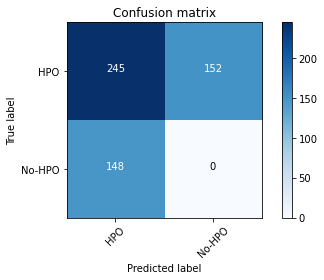

In [127]:


import numpy as np

y_test = []
y_pred = []

# set1 - set2 & set2 - set1
TP = 0 
TN = 0
FP = 0
FN = 0

for doc_id in list(df_train['docID'].unique()):
    inferred = df_anno[df_anno['#Patient ID']==doc_id]['HPO ID'].unique()
    inferred = func.is_phenotypic_abnormality(graph, list(inferred))
    gold = df_train[df_train['docID']==doc_id]['hpo'].unique()
    gold = [i.replace('_', ':') for i in gold]
    gold = func.update_deprecated_OBO(list(gold), d_trans)
    gold = func.is_phenotypic_abnormality(graph, list(gold))
    #gold = in_hpo(list(gold), list(id_to_name.keys()))
    #break
    TP += len(np.intersect1d(list(set(gold)), list(set(inferred))))
    FN += len(set(gold) - set(inferred))
    FP +=  len(set(inferred) - set(gold))
    
    for i in range(len(np.intersect1d(list(set(gold)), list(set(inferred))))):
        y_test.append(1)
        y_pred.append(1)
    for i in range(len(set(gold) - set(inferred))):
        y_test.append(1)
        y_pred.append(0)
    for i in range(len(set(inferred) - set(gold))):
        y_test.append(0)
        y_pred.append(1)
    #print('TP: ', len(np.intersect1d(list(set(gold)), list(set(inferred)))))
    print('FN: ', len(set(gold) - set(inferred)))
    print('FP: ', len(set(inferred) - set(gold)))
    print(doc_id, len(inferred), len(gold))
    y_pred.append(0)
    y_test.append(0)
    
cnf_matrix = np.array([[TP, FN], [FP, TN]])

plt = func.print_confusion_matrix(cnf_matrix, classes=['HPO', 'No-HPO'], title='Confusion matrix')

## Calculate spec, sens, ppv

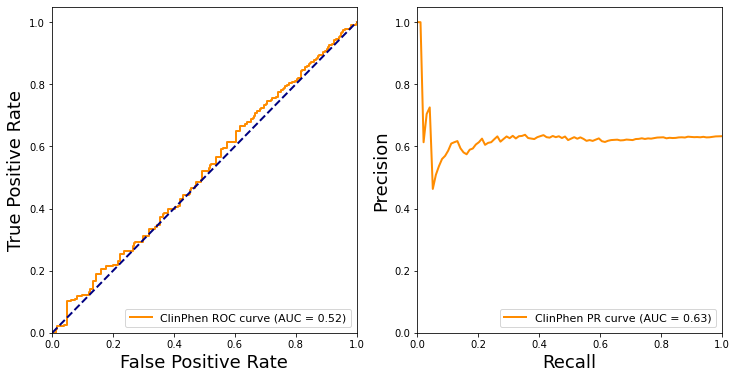

In [128]:
#neurodevelopmental disorder
#Neurologic abnormalities
import importlib as imp

imp.reload(func)

func.plot_performance(y_pred,y_test, clf_name='ClinPhen')

In [143]:
func.print_perf(TP, FP, TN, FN)

Sensitivity:	 0.62
Specificity:	 0.0
PPV:		 0.62
NPV:		 0.0
F1:		 0.62
Accuracy:	 0.45


In [140]:
df_train[df_train['docID']==76].drop_duplicates('hpo') # 87 - malformations 

,entID,docID,start,end,hpo,entity,text
203,631,76,41,58,HP_0006746,neurofibromatosis,To gain insight into the pathogenesis of neuro...
204,632,76,93,114,HP_0000284,ocular manifestations,To gain insight into the pathogenesis of neuro...
205,633,76,235,261,HP_0000478,ocular pathologic findings,To gain insight into the pathogenesis of neuro...
206,634,76,380,411,HP_0007787,posterior subcapsular cataracts,To gain insight into the pathogenesis of neuro...
207,635,76,390,411,HP_0000523,subcapsular cataracts,To gain insight into the pathogenesis of neuro...
208,636,76,402,411,HP_0000518,cataracts,To gain insight into the pathogenesis of neuro...
209,637,76,413,433,HP_0100014,epiretinal membranes,To gain insight into the pathogenesis of neuro...
210,638,76,442,465,HP_0100011,intrascleral schwannoma,To gain insight into the pathogenesis of neuro...


In [141]:
## HP:0012825, HP:0012828

In [142]:
df_anno[df_anno['#Patient ID']==76]

,#Patient ID,HPO ID,Phenotype name,No. occurrences,Earliness (lower = earlier)
359,76,HP:0000518,Cataract,4,7
360,76,HP:0000519,Developmental cataract,4,7
361,76,HP:0000523,Subcapsular cataract,4,7
362,76,HP:0001118,Juvenile cataract,4,7
363,76,HP:0007787,Posterior subcapsular cataract,4,7
364,76,HP:0100014,Epiretinal membrane,4,8
365,76,HP:0001067,Neurofibromas,2,0
366,76,HP:0007524,Atypical neurofibromatosis,2,0
367,76,HP:0100008,Schwannoma,2,10
368,76,HP:0010923,Anterior subcapsular cataract,2,11


In [132]:
# Neurologic abnormalities
# Neurodevelopmental - Neurologic 
# abnormalities - disorder
# disposition - aspect (happy disposition)
df_train[df_train['docID']==76]['text'].iloc[0]

'Neurofibromatosis type 2 (NF2) is an autosomal dominant syndrome characterized by the development of vestibular schwannomas and other tumors of the nervous system, including cranial and spinal meningiomas, schwannomas, and ependymomas. The presence of bilateral vestibular schwannomas is sufficient for the diagnosis. Skin manifestations are less common than in neurofibromatosis type 1 (NF1; von Recklinghausen disease). The apparent clinical distinction between NF1 and NF2 has been confirmed at the level of the gene locus by linkage studies; the gene for NF1 maps to chromosome 17, whereas the gene for NF2 has been assigned (in a single family) to chromosome 22. To increase the precision of the genetic mapping of NF2 and to determine whether additional susceptibility loci exist, we have performed linkage analysis on 12 families with NF2 by using four polymorphic markers from chromosome 22 and a marker at the NF1 locus on chromosome 17. Our results confirm the assignment of the gene for N

In [ ]:
electroencephalographic patterns


In [89]:
set(list(df_anno[df_anno['docID']==0]['hpo'].unique())) - set(list(df_clinphen['HPO ID'].unique()))

{'HP_0000006',
 'HP_0001156',
 'HP_0001363',
 'HP_0001385',
 'HP_0001792',
 'HP_0001798',
 'HP_0008090',
 'HP_0008368',
 'HP_0009702',
 'HP_0009881',
 'HP_0010239',
 'HP_0100264'}

In [39]:
set(list(df_anno[df_anno['docID']==0]['hpo'].unique()))

{'HP_0001156 '}

In [51]:
from spellchecker import SpellChecker

spell = SpellChecker()

# find those words that may be misspelled
misspelled = spell.unknown(['something', 'is', 'hapenning', 'here'])

for word in misspelled:
    # Get the one `most likely` answer
    print(spell.correction(word))

    # Get a list of `likely` options
    print(spell.candidates(word))

happening
{'happening', 'henning', 'penning'}


In [52]:
from spellchecker import SpellChecker

spell = SpellChecker()

# find those words that may be misspelled
misspelled = spell.unknown(['ankylois'])

for word in misspelled:
    # Get the one `most likely` answer
    print(spell.correction(word))

    # Get a list of `likely` options
    print(spell.candidates(word))

ankylois
{'ankylois'}


## Typo Correction

In [64]:
import pickle 
spell = SpellChecker()
spell.word_frequency.load_text_file('data/HPO_vocab.csv')
spell.word_frequency.load_text_file('data/hpo_synonyms.txt')

pickle.dump(spell, open( "spellCheckerHPO.p", "wb" ))

In [65]:
spell = pickle.load(open( "spellCheckerHPO.p", "rb" ))

In [71]:
# find those words that may be misspelled
misspelled = spell.unknown(['this', 'is', 'a', 'test', 'do', 'you', 'know', 'that', 'ankylois', 'piraat', '?'])

for word in misspelled:
    # Get the one `most likely` answer
    print(spell.correction(word))

    # Get a list of `likely` options
    print(spell.candidates(word))

pirate
{'pratt', 'praag', 'piracy', 'piat', 'prat', 'pirate', 'pira', 'piran', 'rifaat', 'pialat'}
ankylosis
{'ankylosis'}


In [83]:
word = 'test2'
if spell.unknown([word]) != {}:
    print(spell.correction(word))

test


## 2. Employ on validation set

In [ ]:
# df_valid

# make two sets

In [37]:
df_valid.head()

,entID,docID,start,end,hpo,entity,text
0,0,0,14,27,HP_0001156,brachydactyly,A syndrome of brachydactyly (absence of some m...
1,1,0,29,71,HP_0009881,absence of some middle or distal phalanges,A syndrome of brachydactyly (absence of some m...
2,2,0,29,71,HP_0010239,absence of some middle or distal phalanges,A syndrome of brachydactyly (absence of some m...
3,3,0,74,103,HP_0001798,aplastic or hypoplastic nails,A syndrome of brachydactyly (absence of some m...
4,4,0,86,103,HP_0001792,hypoplastic nails,A syndrome of brachydactyly (absence of some m...
